<h1 style="text-align:center;">Assignment 2</h1><br>
<div class="alert alert-block alert-info" style="text-align:center;">
    <p style="text-align:center;"><b>Part 1:</b> Trying 2 different  Imputation Methods on the Titanic Dataset, and Evaluating classifier accuracies for each method</p>
</div>   

---

#### Table of Contents:

[1. Module Imports](#1.-Module-Imports)  
[2. Reading Data into Notebook](#2.-Reading-Data-into-Notebook)  
[3. Train - Test Split](#3.-Train---Test-Split)  

Imputation Method 1:  
[4. Train Data Pre-processing](#4.-Train-Data-Pre-processing)  
    4.1. [Age Data Clean-up](#4.1.-Age-Data-Clean-up)   
    4.2. [Fare Data Clean-up](#4.2.-Fare-Data-Clean-up)  
    4.3. [Identfying and Converting Non-Catagorical Data to Catagorical](#4.3.-Identfying-and-Converting-Non-Catagorical-Data-to-Catagorical)  
[5. Hyperparameter Tuning](#5.-Hyperparameter-Tuning)  
[6. Test Data Pre-processing](#6.-Test-Data-Pre-processing)  
    6.1. [Age Data Clean-up](#6.1.-Age-Data-Clean-up)   
    6.2. [Fare Data Clean-up](#6.2.-Fare-Data-Clean-up)  
    6.3. [Identfying and Converting Non-Catagorical Data to Catagorical](#6.3.-Identfying-and-Converting-Non-Catagorical-Data-to-Catagorical)  
[7. Evaluating Test set Accuracy with the Trained Model](#7.-Evaluating-Test-set-Accuracy-with-the-Trained-Model)

Imputation Method 2:  
[8. Train Data Pre-processing](#8.-Train-Data-Pre-processing)  
    8.1. [Age Data Clean-up](#8.1.-Age-Data-Clean-up)   
    8.2. [Fare Data Clean-up](#8.2.-Fare-Data-Clean-up)  
    8.3. [Identfying and Converting Non-Catagorical Data to Catagorical](#8.3.-Identfying-and-Converting-Non-Catagorical-Data-to-Catagorical)    
[9. Hyperparameter Tuning](#9.-Hyperparameter-Tuning)  
[10. Test Data Pre-processing](#10.-Test-Data-Pre-processing)  
    10.1. [Age Data Clean-up](#10.1.-Age-Data-Clean-up)   
    10.2. [Fare Data Clean-up](#10.2.-Fare-Data-Clean-up)  
    10.3. [Identfying and Converting Non-Catagorical Data to Catagorical](#10.3.-Identfying-and-Converting-Non-Catagorical-Data-to-Catagorical)  
[11. Evaluating Test set Accuracy with the Trained Model](#11.-Evaluating-Test-set-Accuracy-with-the-Trained-Model)  
[12. Conclusion](#12.-Conclusion)

---

# 1. Library Imports

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
from sklearn.externals import joblib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

%matplotlib inline

C:\Users\srush\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#Check the path to the directory where you are currently in
# Commenting for Git, providign direct path 
#%pwd

In [3]:
#Define a variable that points to this. This will let you avoid typing the long path everytime you need to use it.
# Commenting for Git, providign direct path 
#my_path = 'C:\\Users\\srush\\Documents\\Srushti NEU\\Full Summer 2020\\INFO 6105 Data Science Engineering Methods and Tools\\Assignment\\Assignment 2'

'Define a variable that points to this. This will let you avoid typing\nthe long path everytime you need to use it'

[Scroll Top](#Assignment-2)

---

# 2. Reading Data into Notebook

In [4]:
'''We will use the Titanic dataset, as supplied here (Titanic_full.csv).'''

df = pd.read_csv('DataSet/Titanic_full.csv')
print(df.shape)
df.head(3)

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


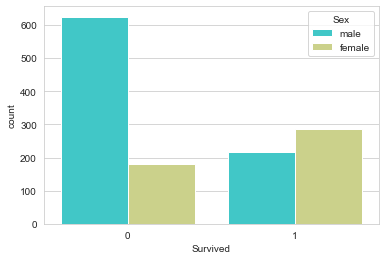

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='rainbow')

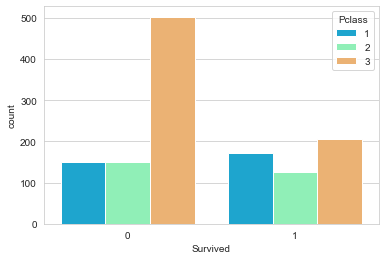

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

[Scroll Top](#Assignment-2)

---

# 3. Train - Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]

#### Split for Method 1:

In [10]:
m1_Train_Val, m1_test = mydf_splitter(df,1150)
print(m1_Train_Val.shape, m1_test.shape)

(1150, 12) (159, 12)


#### Split for Method 2:

In [11]:
m2_Train_Val, m2_test = mydf_splitter(df,1150)
print(m2_Train_Val.shape, m2_test.shape)

(1150, 12) (159, 12)


[Scroll Top](#Assignment-2)

---

<h1 style="text-align:center;">Imputation Method 1</h1>

# 4. Train Data Pre-processing

In [12]:
m1_Train_Val.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1145,False,False,False,False,False,False,False,False,False,False,True,False
1146,False,False,False,False,False,True,False,False,False,False,True,False
1147,False,False,False,False,False,True,False,False,False,False,True,False
1148,False,False,False,False,False,False,False,False,False,False,True,False


In [13]:
m1_Train_Val_1 = m1_Train_Val.drop(["Name","Cabin","Ticket"], axis = 1)
print(m1_Train_Val_1.shape)
m1_Train_Val_1.head(3)

(1150, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


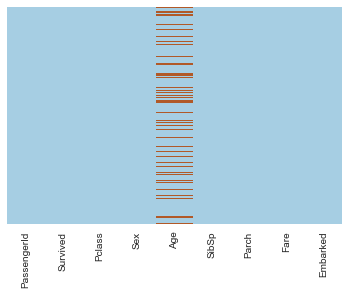

In [14]:
sns.heatmap(m1_Train_Val_1.isnull(), yticklabels=False, cbar=False, cmap='Paired')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

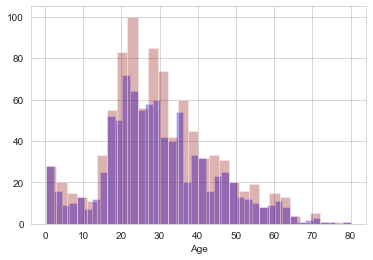

In [15]:
sns.distplot(m1_Train_Val_1['Age'].dropna(), kde=False,color='blue', bins=40)
m1_Train_Val_1['Age'].hist(bins=30,color='darkred', alpha=0.3)

[Scroll Top](#Assignment-2)

### 4.1. Age Data Clean-up

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

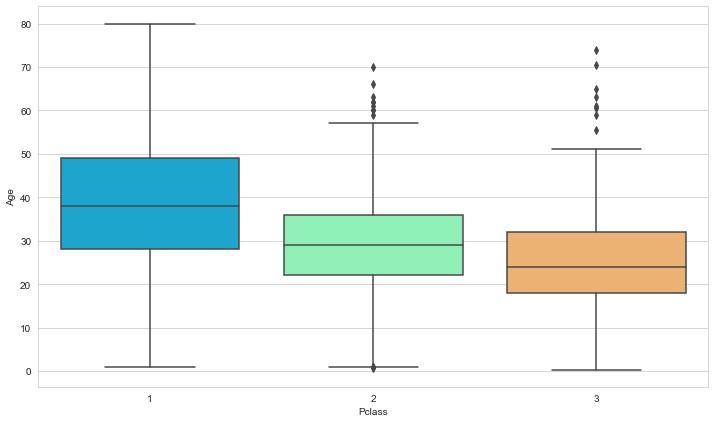

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=m1_Train_Val_1, palette='rainbow')

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [18]:
m1_Train_Val_1['Age'] = m1_Train_Val_1[['Age','Pclass']].apply(impute_age,axis=1)

[Scroll Top](#Assignment-2)

### 4.2. Fare Data Clean-up

In [19]:
m1_Train_Val_1.dropna(inplace=True)
#y_train.dropna(inplace=True)

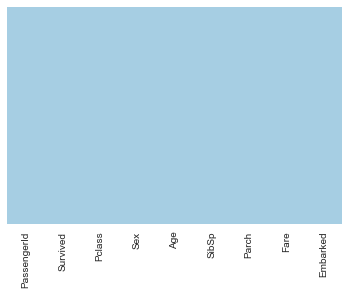

In [20]:
sns.heatmap(m1_Train_Val_1.isnull(), yticklabels=False, cbar=False, cmap='Paired')

[Scroll Top](#Assignment-2)

### 4.3. Identfying and Converting Non-Catagorical Data to Catagorical 

In [21]:
#Check types of each column with the dataframe info () method
m1_Train_Val_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 0 to 1149
Data columns (total 9 columns):
PassengerId    1147 non-null int64
Survived       1147 non-null int64
Pclass         1147 non-null int64
Sex            1147 non-null object
Age            1147 non-null float64
SibSp          1147 non-null int64
Parch          1147 non-null int64
Fare           1147 non-null float64
Embarked       1147 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 89.6+ KB


In [22]:
def str_to_cat(my_df):
    for p,q in my_df.items(): 
        if is_string_dtype(q):
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

In [23]:
m1_Train_Val_2 = str_to_cat(m1_Train_Val_1)
print()

In [24]:
def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if (null_status and not my_df['Age']) in null_table else feature.mean()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [25]:
m1_Train_Val_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 0 to 1149
Data columns (total 9 columns):
PassengerId    1147 non-null int64
Survived       1147 non-null int64
Pclass         1147 non-null int64
Sex            1147 non-null category
Age            1147 non-null float64
SibSp          1147 non-null int64
Parch          1147 non-null int64
Fare           1147 non-null float64
Embarked       1147 non-null category
dtypes: category(2), float64(2), int64(5)
memory usage: 74.1 KB


In [26]:
print(m1_Train_Val_2.Embarked.cat.categories)

Index(['C', 'Q', 'S'], dtype='object')


In [27]:
m1_Train_Val_3, my_table = mydf_preprocessor(m1_Train_Val_2,null_table = None)
print(m1_Train_Val_3.shape)
m1_Train_Val_3.head(3)

(1147, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,2,22.0,1,0,7.2500,3
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,3


In [28]:
y_train_Val_m1 = m1_Train_Val_3["Survived"]
X_train_Val_m1 = m1_Train_Val_3.drop(["Survived"],axis = 1)

print(X_train_Val_m1.shape, y_train_Val_m1.shape)

(1147, 8) (1147,)


In [29]:
X_train_m1, X_val_m1, y_train_m1, y_val_m1 = train_test_split(X_train_Val_m1, y_train_Val_m1, random_state=1)
print(X_train_m1.shape, X_val_m1.shape, y_train_m1.shape, y_val_m1.shape)

(860, 8) (287, 8) (860,) (287,)


[Scroll Top](#Assignment-2)

---

# 5. Hyperparameter Tuning

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = RandomForestClassifier(n_jobs = -1, n_estimators = 600, bootstrap = True)

In [32]:
rfc.fit(X_train_m1, y_train_m1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [33]:
y_prd_m1 = rfc.predict(X_val_m1)
accuracy_score(y_val_m1, y_prd_m1)

0.7909407665505227

[Scroll Top](#Assignment-2)

---

# 6. Test Data Pre-processing

In [34]:
m1_test.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1150,False,False,False,False,False,False,False,False,False,False,True,False
1151,False,False,False,False,False,False,False,False,False,False,True,False
1152,False,False,False,False,False,False,False,False,False,False,True,False
1153,False,False,False,False,False,False,False,False,False,False,True,False
1154,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,True,False,False,False,False,True,False
1305,False,False,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False,True,False
1307,False,False,False,False,False,True,False,False,False,False,True,False


In [35]:

m1_test_1 = m1_test.drop(["Name","Cabin","Ticket"],axis = 1)
print(m1_test_1.shape)
m1_test_1.head(3)

(159, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1150,1151,1,3,male,21.0,0,0,7.7750,S
1151,1152,0,3,male,36.5,1,0,17.4000,S
1152,1153,1,3,male,21.0,0,0,7.8542,S


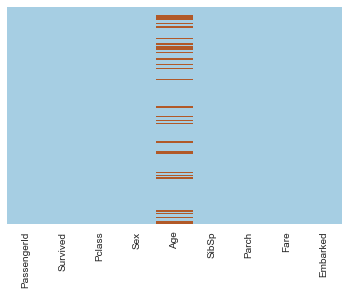

In [36]:
sns.heatmap(m1_test_1.isnull(), yticklabels=False, cbar=False, cmap='Paired')

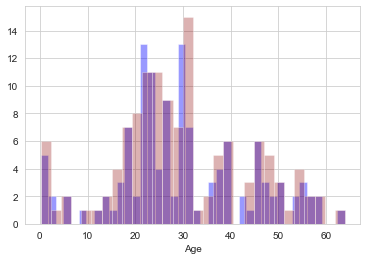

In [37]:
sns.distplot(m1_test_1['Age'].dropna(), kde=False, color='blue', bins=40)
m1_test_1['Age'].hist(bins=30, color='darkred', alpha=0.3)

[Scroll Top](#Assignment-2)

### 6.1. Age Data Clean-up

In [38]:
m1_test_1['Age'] = m1_test_1[['Age','Pclass']].apply(impute_age,axis=1)

[Scroll Top](#Assignment-2)

### 6.2. Fare Data Clean-up

In [39]:
m1_test_1.dropna(inplace=True)

[Scroll Top](#Assignment-2)

### 6.3. Identfying and Converting Non-Catagorical Data to Catagorical 

In [40]:
#Check types of each column with the dataframe info () method
m1_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 1150 to 1308
Data columns (total 9 columns):
PassengerId    159 non-null int64
Survived       159 non-null int64
Pclass         159 non-null int64
Sex            159 non-null object
Age            159 non-null float64
SibSp          159 non-null int64
Parch          159 non-null int64
Fare           159 non-null float64
Embarked       159 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 12.4+ KB


In [41]:
m1_test_2 = str_to_cat(m1_test_1)
m1_test_2.Sex.cat.categories

Index(['female', 'male'], dtype='object')

In [42]:
m1_test_3,my_table = mydf_preprocessor(m1_test_2,null_table = None)
print(m1_test_3.shape)
m1_test_3.head(3)

(159, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1150,1151,1,3,2,21.0,0,0,7.7750,3
1151,1152,0,3,2,36.5,1,0,17.4000,3
1152,1153,1,3,2,21.0,0,0,7.8542,3


In [43]:
y_test_m1 = m1_test_3["Survived"]
X_test_m1 = m1_test_3.drop(["Survived"],axis = 1)

print(X_test_m1.shape, y_test_m1.shape)

(159, 8) (159,)


In [44]:
y_prd_test_m1 = rfc.predict(X_test_m1)
accuracy_score(y_test_m1, y_prd_test_m1)

0.5157232704402516

[Scroll Top](#Assignment-2)

---

# 7. Evaluating Test set Accuracy with the Trained Model

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print("Classification Report\n")
print(classification_report(y_test_m1, y_prd_test_m1))

Classification Report

              precision    recall  f1-score   support

           0       0.56      0.51      0.53        86
           1       0.47      0.52      0.50        73

    accuracy                           0.52       159
   macro avg       0.52      0.52      0.52       159
weighted avg       0.52      0.52      0.52       159



In [47]:
print("Confusion Matrix\n")
print(confusion_matrix(y_test_m1, y_prd_test_m1))

Confusion Matrix

[[44 42]
 [35 38]]


In [48]:
#Calculating accuracy on trained model

print("\nAccuracy Score")
print(accuracy_score(y_test_m1, y_prd_test_m1))

print("\nMatthews Corrcoef")
print(matthews_corrcoef(y_test_m1, y_prd_test_m1))
      
print("\nF1 Score")
print(f1_score(y_test_m1, y_prd_test_m1))


Accuracy Score
0.5157232704402516

Matthews Corrcoef
0.032068760531501185

F1 Score
0.49673202614379086


[Scroll Top](#Assignment-2)

---

# Imputation Method 2:

# 8. Train Data Pre-processing

In [49]:
m2_Train_Val.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1145,False,False,False,False,False,False,False,False,False,False,True,False
1146,False,False,False,False,False,True,False,False,False,False,True,False
1147,False,False,False,False,False,True,False,False,False,False,True,False
1148,False,False,False,False,False,False,False,False,False,False,True,False


In [50]:
m2_Train_Val_1 = m2_Train_Val.drop(["Name","Cabin","Ticket"],axis = 1)
print(m2_Train_Val_1.shape)
m2_Train_Val_1.head(3)

(1150, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


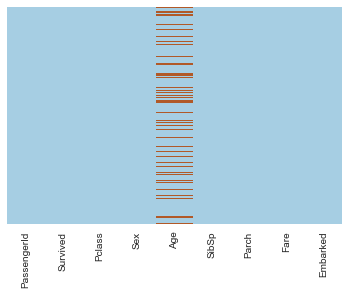

In [51]:
sns.heatmap(m2_Train_Val_1.isnull(), yticklabels=False, cbar=False, cmap='Paired')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

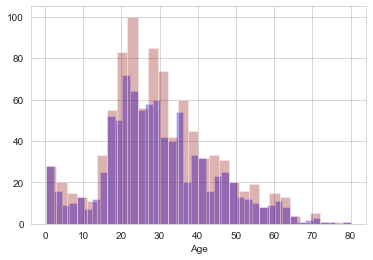

In [52]:
sns.distplot(m2_Train_Val_1['Age'].dropna(), kde=False, color='blue', bins=40)
m2_Train_Val_1['Age'].hist(bins=30, color='darkred', alpha=0.3)

[Scroll Top](#Assignment-2)

### 8.1. Age Data Clean-up

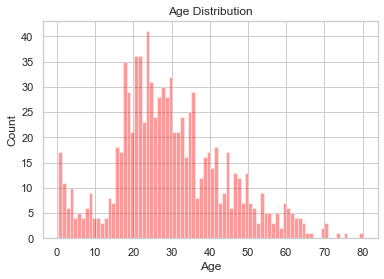

In [53]:
with sns.plotting_context("notebook",font_scale=1):
    sns.set_style("whitegrid")
    sns.distplot(m2_Train_Val_1["Age"].dropna(),bins=80, kde=False, color="red")
    plt.title("Age Distribution")
    plt.ylabel("Count");

In [54]:
#function to impute (Method 2) mean in Age feature
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(m2_Train_Val_1[m2_Train_Val_1["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

In [55]:
m2_Train_Val_1['Age'] = m2_Train_Val_1[['Age','Pclass']].apply(add_age,axis=1)

[Scroll Top](#Assignment-2)

### 8.2. Fare Data Clean-up

In [56]:
#dropping null values
m2_Train_Val_1.dropna(inplace=True)

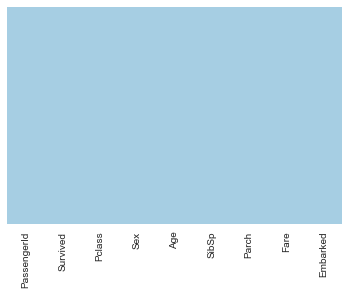

In [57]:
sns.heatmap(m2_Train_Val_1.isnull(), yticklabels=False, cbar=False, cmap='Paired')

[Scroll Top](#Assignment-2)

### 8.3. Identfying and Converting Non-Catagorical Data to Catagorical 

In [58]:
#Check types of each column with the dataframe info () method
m2_Train_Val_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 0 to 1149
Data columns (total 9 columns):
PassengerId    1147 non-null int64
Survived       1147 non-null int64
Pclass         1147 non-null int64
Sex            1147 non-null object
Age            1147 non-null float64
SibSp          1147 non-null int64
Parch          1147 non-null int64
Fare           1147 non-null float64
Embarked       1147 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 89.6+ KB


In [59]:
#String to Category function
def str_to_cat(my_df):
    for p,q in my_df.items(): 
        if is_string_dtype(q):
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

In [60]:
m2_Train_Val_2 = str_to_cat(m2_Train_Val_1)
print()

In [61]:
def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if (null_status) in null_table else feature.mean()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [62]:
m2_Train_Val_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 0 to 1149
Data columns (total 9 columns):
PassengerId    1147 non-null int64
Survived       1147 non-null int64
Pclass         1147 non-null int64
Sex            1147 non-null category
Age            1147 non-null float64
SibSp          1147 non-null int64
Parch          1147 non-null int64
Fare           1147 non-null float64
Embarked       1147 non-null category
dtypes: category(2), float64(2), int64(5)
memory usage: 74.1 KB


In [63]:
print(m2_Train_Val_2.Embarked.cat.categories)

Index(['C', 'Q', 'S'], dtype='object')


In [64]:
m2_Train_Val_3, my_table = mydf_preprocessor(m2_Train_Val_2, null_table = None)
print(m2_Train_Val_3.shape)
m2_Train_Val_3.head(3)

(1147, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,2,22.0,1,0,7.2500,3
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,3


In [65]:
#Splitting vertically Dependent and Independent features
y_train_m2 = m2_Train_Val_3["Survived"]
X_train_m2 = m2_Train_Val_3.drop(["Survived"],axis = 1)

print(X_train_m2.shape, y_train_m2.shape)

(1147, 8) (1147,)


In [66]:
X_train_m2, X_val_m2, y_train_m2, y_val_m2 = train_test_split(X_train_m2, y_train_m2, random_state=1)
print(X_train_m2.shape, X_val_m2.shape, y_train_m2.shape, y_val_m2.shape)

(860, 8) (287, 8) (860,) (287,)


[Scroll Top](#Assignment-2)

---

# 9. Hyperparameter Tuning

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc = RandomForestClassifier(n_jobs = -1, n_estimators = 600, bootstrap = True)

In [69]:
rfc.fit(X_train_m2, y_train_m2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [70]:
y_prd_m2 = rfc.predict(X_val_m2)
accuracy_score(y_val_m2, y_prd_m2)

0.7770034843205574

[Scroll Top](#Assignment-2)

---

# 10. Test Data Pre-processing

In [71]:
m2_test.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1150,False,False,False,False,False,False,False,False,False,False,True,False
1151,False,False,False,False,False,False,False,False,False,False,True,False
1152,False,False,False,False,False,False,False,False,False,False,True,False
1153,False,False,False,False,False,False,False,False,False,False,True,False
1154,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,True,False,False,False,False,True,False
1305,False,False,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False,True,False
1307,False,False,False,False,False,True,False,False,False,False,True,False


In [72]:
#Dropping "Name","Cabin","Ticket" columns
m2_test_1 = m2_test.drop(["Name","Cabin","Ticket"], axis = 1)
print(m2_test_1.shape)
m2_test_1.head(3)

(159, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1150,1151,1,3,male,21.0,0,0,7.7750,S
1151,1152,0,3,male,36.5,1,0,17.4000,S
1152,1153,1,3,male,21.0,0,0,7.8542,S


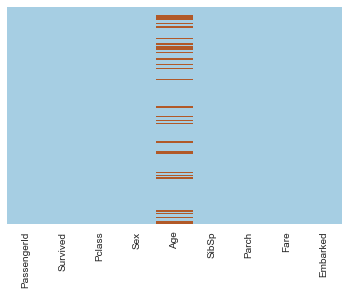

In [73]:
sns.heatmap(m2_test_1.isnull(), yticklabels=False, cbar=False, cmap='Paired')

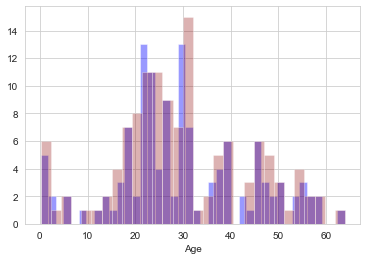

In [74]:
sns.distplot(m2_test_1['Age'].dropna(), kde=False, color='blue', bins=40)
m2_test_1['Age'].hist(bins=30, color='darkred', alpha=0.3)

[Scroll Top](#Assignment-2)

### 10.1. Age Data Clean-up

In [75]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(m2_test_1[m2_test_1["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age


m2_test_1['Age'] = m2_test_1[['Age','Pclass']].apply(add_age,axis=1)

[Scroll Top](#Assignment-2)

### 10.2. Fare Data Clean-up

In [76]:
#dropping null values
m2_test_1.dropna(inplace=True)

[Scroll Top](#Assignment-2)

### 10.3. Identfying and Converting Non-Catagorical Data to Catagorical 

In [77]:
#Check types of each column with the dataframe info () method
m2_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 1150 to 1308
Data columns (total 9 columns):
PassengerId    159 non-null int64
Survived       159 non-null int64
Pclass         159 non-null int64
Sex            159 non-null object
Age            159 non-null float64
SibSp          159 non-null int64
Parch          159 non-null int64
Fare           159 non-null float64
Embarked       159 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 12.4+ KB


In [78]:
#calling String to Category function
m2_test_2 = str_to_cat(m2_test_1)
m2_test_2.Sex.cat.categories

Index(['female', 'male'], dtype='object')

In [79]:
#Calling mydf_preprocessor function 
m2_test_3, my_table = mydf_preprocessor(m2_test_2, null_table = None)
print(m2_test_3.shape)
m2_test_3.head(3)

(159, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1150,1151,1,3,2,21.0,0,0,7.7750,3
1151,1152,0,3,2,36.5,1,0,17.4000,3
1152,1153,1,3,2,21.0,0,0,7.8542,3


In [80]:
y_test_m2 = m2_test_3["Survived"]
X_test_m2 = m2_test_3.drop(["Survived"],axis = 1)

print(X_test_m2.shape, y_test_m2.shape)

(159, 8) (159,)


In [81]:
y_prd_test_m2 = rfc.predict(X_test_m2)
accuracy_score(y_test_m2, y_prd_test_m2)

0.5345911949685535

[Scroll Top](#Assignment-2)

---

# 11. Evaluating Test set Accuracy with the Trained Model

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
print("Classification Report\n")
print(classification_report(y_test_m2, y_prd_test_m2))

Classification Report

              precision    recall  f1-score   support

           0       0.57      0.56      0.56        86
           1       0.49      0.51      0.50        73

    accuracy                           0.53       159
   macro avg       0.53      0.53      0.53       159
weighted avg       0.54      0.53      0.53       159



In [84]:
print("Confusion Matrix\n")
print(confusion_matrix(y_test_m2, y_prd_test_m2))

Confusion Matrix

[[48 38]
 [36 37]]


In [85]:
#Calculating accuracy on trained model

print("\nAccuracy Score")
print(accuracy_score(y_test_m2, y_prd_test_m2))

print("\nMatthews Corrcoef")
print(matthews_corrcoef(y_test_m2, y_prd_test_m2))
      
print("\nF1 Score")
print(f1_score(y_test_m2, y_prd_test_m2))


Accuracy Score
0.5345911949685535

Matthews Corrcoef
0.06487527812033646

F1 Score
0.5


[Scroll Top](#Assignment-2)

# 12. Conclusion

In [86]:
#Compairing accuracies from both imputation methods

print("\nAccuracy Score of Imputation Method 1(Average of Age based on 3 PClass category)")
print(accuracy_score(y_test_m1, y_prd_test_m1))

print("\nAccuracy Score of Imputation Method 2 (Mean of Age)")
print(accuracy_score(y_test_m2, y_prd_test_m2))


Accuracy Score of Imputation Method 1(Average of Age based on 3 PClass category)
0.5157232704402516

Accuracy Score of Imputation Method 2 (Mean of Age)
0.5345911949685535


[Scroll Top](#Assignment-2)

---

<div class="alert alert-block alert-info">
    <b>Copyright</b> 2020 Srushti Dhamangaonkar<br>
    <br>Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:<br>
    <br>The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.<br>
    <br>THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
    <br><br>
    
<div class="text-center">
    <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.<br>
</div></div>